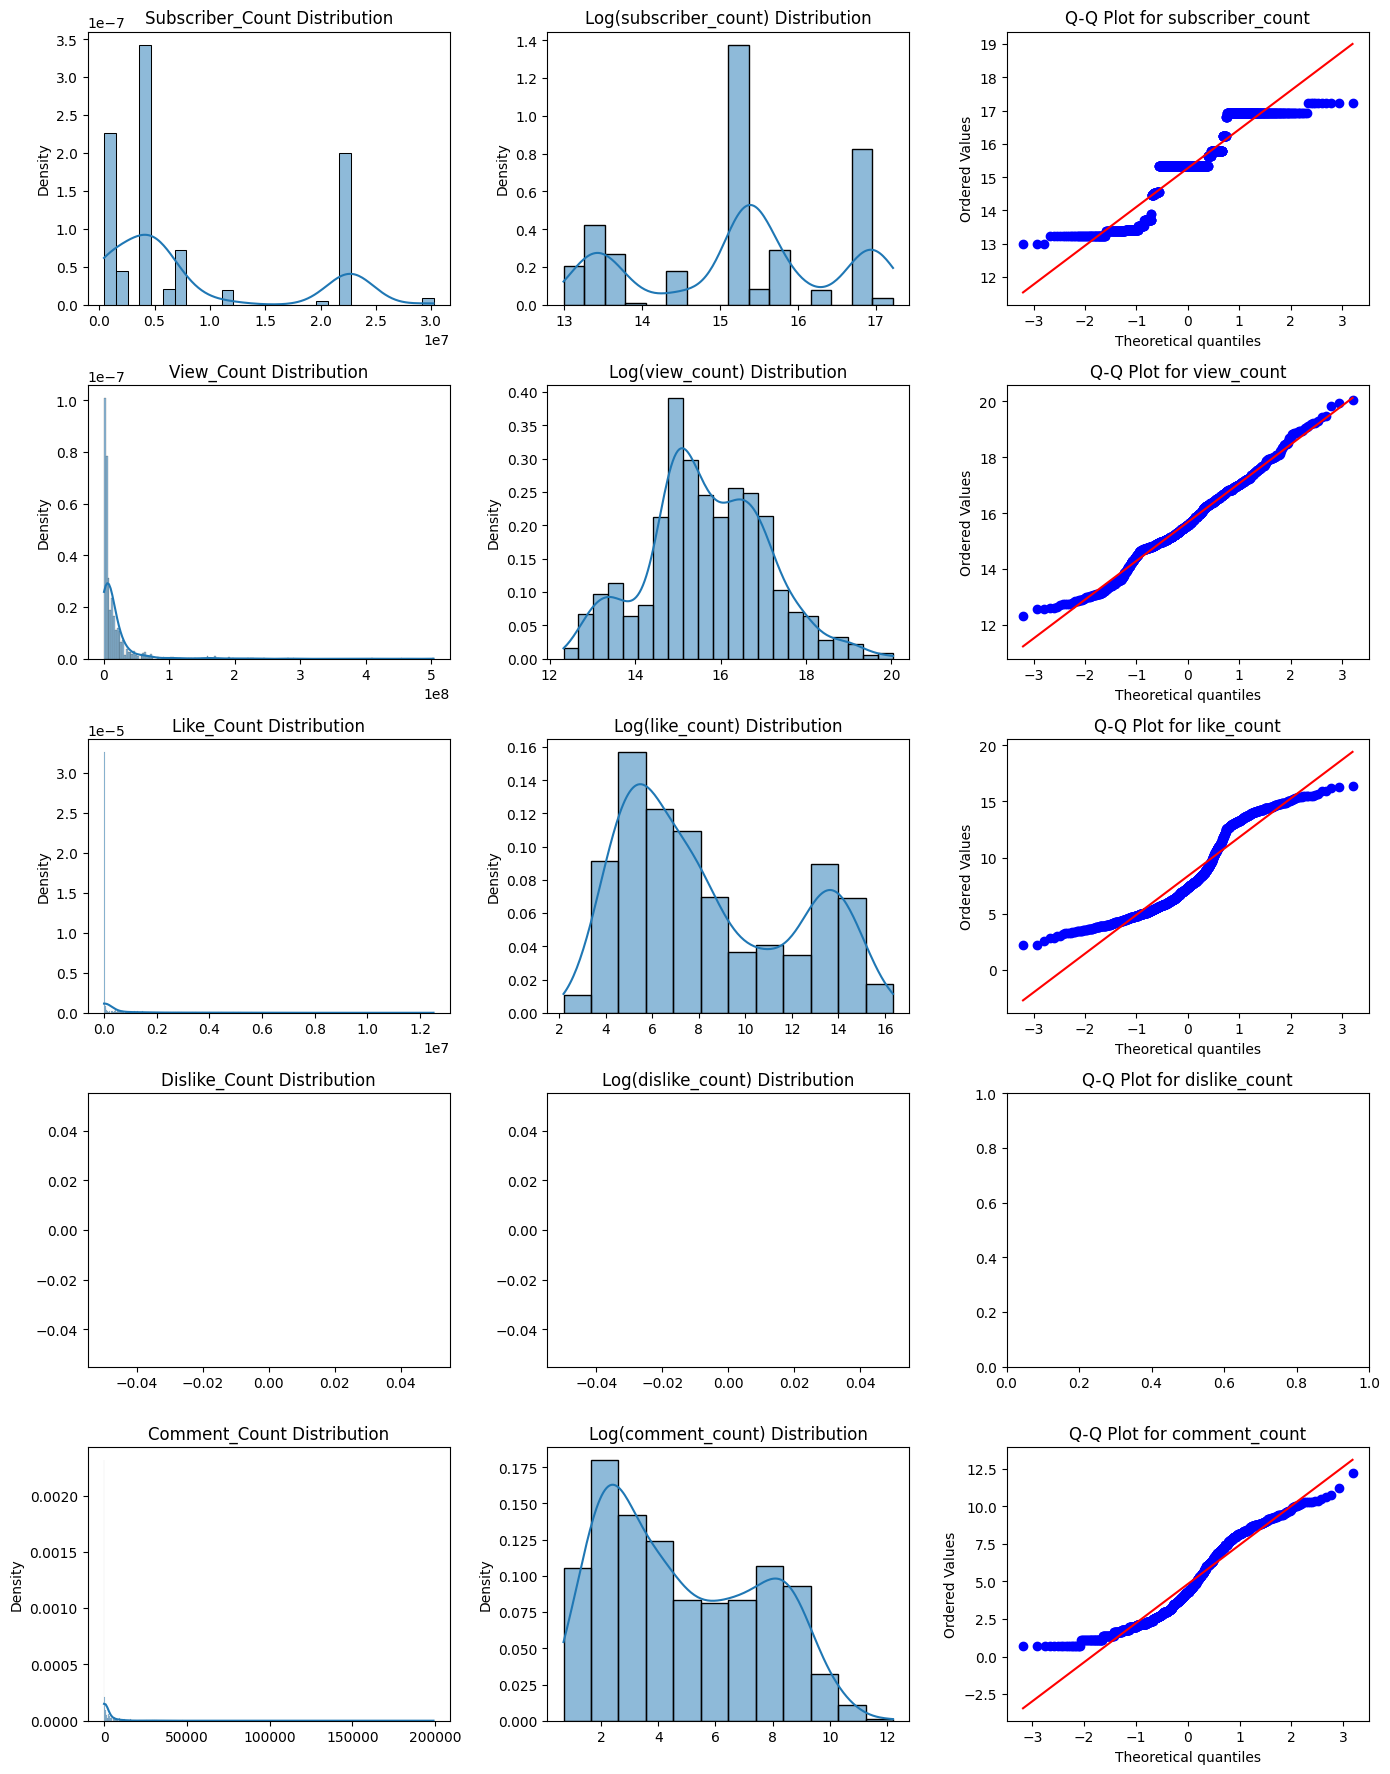

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

filtered_video_records_df = pd.read_csv('filtered_youtube_videos_data.csv')

filtered_video_records_df['like_count'].replace(0, np.nan)
filtered_video_records_df['comment_count'].replace(0, np.nan)
filtered_video_records_df['subscriber_count'].replace(0, np.nan)
filtered_video_records_df['view_count'].replace(0, np.nan)
filtered_video_records_df = filtered_video_records_df[filtered_video_records_df['like_count'].isna() == False]
filtered_video_records_df = filtered_video_records_df[filtered_video_records_df['comment_count'].isna() == False]
filtered_video_records_df = filtered_video_records_df[filtered_video_records_df['subscriber_count'].isna() == False]
filtered_video_records_df = filtered_video_records_df[filtered_video_records_df['view_count'].isna() == False]


# Create a 5-row, 2-column grid (one row per metric)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 18))
columns = ['subscriber_count', 'view_count', 'like_count', 'dislike_count', 'comment_count']

for i, col in enumerate(columns):
    # Get clean data (handle zeros)
    data = filtered_video_records_df[col].replace(0, np.nan).dropna()
    
    # Left column: Distribution plot
    sns.histplot(data, kde=True, ax=axes[i, 0], stat='density')
    axes[i, 0].set_title(f'{col.title()} Distribution')
    axes[i, 0].set_xlabel('')

    log_data = np.log1p(data)  # log(x+1) transformation
    
    # Left column: Distribution plot
    sns.histplot(log_data, kde=True, ax=axes[i, 1], stat='density')
    axes[i, 1].set_title(f'Log({col}) Distribution')
    axes[i, 1].set_xlabel('')
    
    # Right column: Q-Q Plot
    stats.probplot(log_data, dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

In [28]:
filtered_video_records_df['subscriber_count'].describe()

count    1.023000e+03
mean     8.109210e+06
std      8.415784e+06
min      4.370000e+05
25%      1.890000e+06
50%      4.600000e+06
75%      7.270000e+06
max      3.020000e+07
Name: subscriber_count, dtype: float64

In [29]:
filtered_video_records_df['view_count'].describe()

count    1.023000e+03
mean     1.750124e+07
std      3.903298e+07
min      2.249190e+05
25%      2.734211e+06
50%      5.791729e+06
75%      1.682105e+07
max      5.032566e+08
Name: view_count, dtype: float64

In [30]:
filtered_video_records_df['like_count'].describe()
# print(filtered_video_records_df[filtered_video_records_df['like_count'].isna() == True]['channel_name'].unique())
# len(filtered_video_records_df[filtered_video_records_df['like_count'].isna() == True])

count    1.023000e+03
mean     3.766254e+05
std      1.101475e+06
min      8.000000e+00
25%      2.140000e+02
50%      1.524000e+03
75%      1.066745e+05
max      1.250724e+07
Name: like_count, dtype: float64

In [31]:
filtered_video_records_df['dislike_count'].describe()
# display(filtered_video_records_df[filtered_video_records_df['dislike_count'].isna() == True])

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dislike_count, dtype: float64

In [32]:
filtered_video_records_df['comment_count'].describe()

count      1023.000000
mean       2022.652004
std        8060.083914
min           0.000000
25%           8.000000
50%          49.000000
75%        1029.500000
max      198953.000000
Name: comment_count, dtype: float64

In [33]:
# Add ratio columns with error handling for zero denominators
import numpy as np
import pandas as pd

filtered_video_records_df = filtered_video_records_df.assign(
    views_per_sub=lambda x: np.where(x['subscriber_count'] > 0, 
                                   x['view_count']/x['subscriber_count'], 
                                   np.nan),
    like_per_view=lambda x: np.where(x['view_count'] > 0, 
                                   x['like_count']/x['view_count'], 
                                   np.nan),
    dislike_per_view=lambda x: np.where(x['view_count'] > 0, 
                                      x['dislike_count']/x['view_count'], 
                                      np.nan),
    comment_per_view=lambda x: np.where(x['view_count'] > 0, 
                                      x['comment_count']/x['view_count'], 
                                      np.nan)
)

# Calculate channel statistics
channel_stats = (
    filtered_video_records_df.groupby('channel_name')
    .agg(
        video_count=('video_id', 'count'),
        avg_views_per_sub=('views_per_sub', 'mean'),
        avg_like_per_view=('like_per_view', 'mean'),
        avg_dislike_per_view=('dislike_per_view', 'mean'),
        avg_comment_per_view=('comment_per_view', 'mean')
    )
    .reset_index()
    .sort_values('video_count', ascending=False)
)

# Merge stats back to original DF (optional but useful)
filtered_video_records_df = filtered_video_records_df.merge(
    channel_stats, on='channel_name'
)

print(len(filtered_video_records_df))
display(channel_stats)

# display(channel_stats[['channel_name', 'video_count']].style.hide(axis='index'))
# Display dataframe
display(filtered_video_records_df.head(5))



1023


,channel_name,video_count,avg_views_per_sub,avg_like_per_view,avg_dislike_per_view,avg_comment_per_view
2,Coca-Cola,373,1.455785,0.000380,NaN,0.000016
10,Red Bull,218,2.347920,0.034489,NaN,0.000148
11,Samsung,78,2.109895,0.002480,NaN,0.000063
0,Airbnb,58,11.348714,0.000554,NaN,0.000019
12,Sony,57,2.394165,0.007838,NaN,0.000249
5,Intel,53,2.981640,0.000794,NaN,0.000062
17,amazon,40,8.484714,0.000537,NaN,0.000094
6,McDonald's,29,2.230110,0.005087,NaN,0.000231
3,Disney,23,1.369892,0.012786,NaN,0.001144
7,Microsoft,22,1.416756,0.004955,NaN,0.000170


,channel_name,channel_id,channel_url,channel_description,channel_join_date,subscriber_count,video_id,video_url,title,description,...,duration_seconds,views_per_sub,like_per_view,dislike_per_view,comment_per_view,video_count,avg_views_per_sub,avg_like_per_view,avg_dislike_per_view,avg_comment_per_view
0,Nike,UCUFgkRb0ZHc4Rpq15VRCICA,https://www.youtube.com/@Nike,You can't win. So Win.\n\nFor more information...,2006-03-08T03:18:02Z,2110000,b0Ezn5pZE7o,https://www.youtube.com/watch?v=b0Ezn5pZE7o,So Win. | Nike,There’s one guarantee in sport. You’ll be told...,...,61,1.544583,0.006086,NaN,0.000306,13,5.551082,0.005033,NaN,0.000203
1,Nike,UCUFgkRb0ZHc4Rpq15VRCICA,https://www.youtube.com/@Nike,You can't win. So Win.\n\nFor more information...,2006-03-08T03:18:02Z,2110000,xMrUkDYvbDc,https://www.youtube.com/watch?v=xMrUkDYvbDc,I Told You So | Nike,The best athletes are open books.\nThey’ll tel...,...,31,1.188055,0.001694,NaN,0.000034,13,5.551082,0.005033,NaN,0.000203
2,Nike,UCUFgkRb0ZHc4Rpq15VRCICA,https://www.youtube.com/@Nike,You can't win. So Win.\n\nFor more information...,2006-03-08T03:18:02Z,2110000,JfK0mHEy0po,https://www.youtube.com/watch?v=JfK0mHEy0po,Joy | Nike,Feeling great doesn’t always feel good.\n\nSub...,...,31,0.884321,0.002477,NaN,0.000038,13,5.551082,0.005033,NaN,0.000203
3,Nike,UCUFgkRb0ZHc4Rpq15VRCICA,https://www.youtube.com/@Nike,You can't win. So Win.\n\nFor more information...,2006-03-08T03:18:02Z,2110000,pwLergHG81c,https://www.youtube.com/watch?v=pwLergHG81c,WINNING ISN’T FOR EVERYONE | AM I A BAD PERSON...,"You can’t win them all, but you should sure as...",...,91,1.620398,0.014837,NaN,0.001002,13,5.551082,0.005033,NaN,0.000203
4,Nike,UCUFgkRb0ZHc4Rpq15VRCICA,https://www.youtube.com/@Nike,You can't win. So Win.\n\nFor more information...,2006-03-08T03:18:02Z,2110000,C_BZQkU5Cds,https://www.youtube.com/watch?v=C_BZQkU5Cds,WHAT IF YOU CAN? | Nike,Imagine being a team player who has never met ...,...,96,17.848046,0.005159,NaN,0.000019,13,5.551082,0.005033,NaN,0.000203


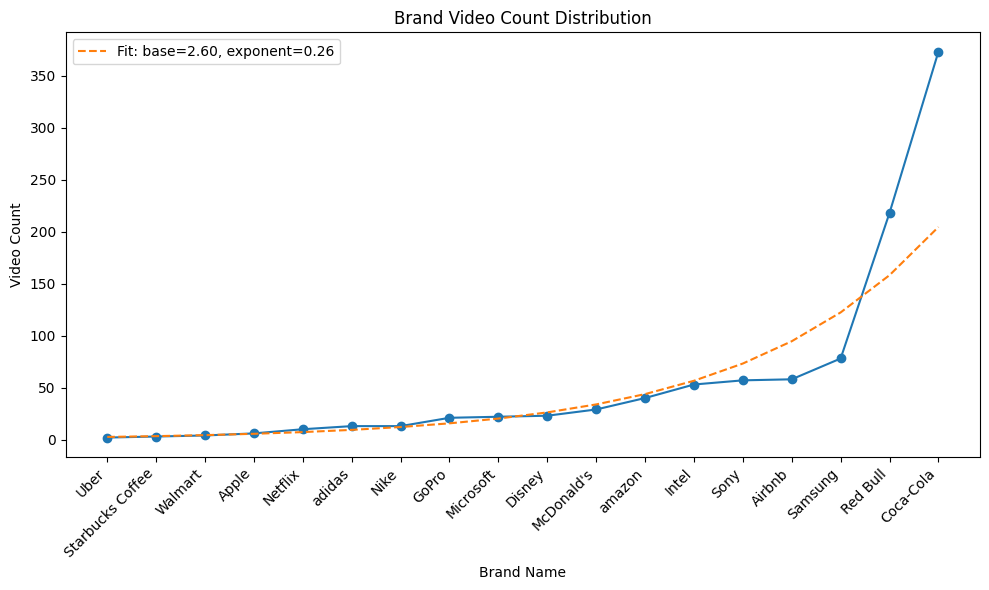

Base: 2.595757551554321, Exponent: 0.2568384887223624


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by video_count ascending
channel_stats = channel_stats.sort_values('video_count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
channels = list(channel_stats['channel_name'])
counts = list(channel_stats['video_count'])

plt.plot(channels, counts, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Video Count')
plt.title('Brand Video Count Distribution')

# Log-transform to check exponential growth
log_counts = np.log(counts)
coefficients = np.polyfit(range(len(log_counts)), log_counts, 1)
fitted_exponent = coefficients[0]
fitted_base = np.exp(coefficients[1])

# Plot exponential fitting
fitted_counts = fitted_base * np.exp(fitted_exponent * np.arange(len(counts)))
plt.plot(channels, fitted_counts, '--', label=f'Fit: base={fitted_base:.2f}, exponent={fitted_exponent:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Output base and exponent
print(f"Base: {fitted_base}, Exponent: {fitted_exponent}")


In [35]:
import numpy as np
import pandas as pd

def exponential_dropout(df, channel_col, fitted_base, fitted_exponent, drop_out_rate=0.75, random_state=None):
    """
    Randomly drops entries from a DataFrame based on an exponential formula.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    channel_col (str): Column name indicating the channel.
    fitted_base (float): The base from exponential fitting.
    fitted_exponent (float): The exponent from exponential fitting.
    drop_out_rate (float): A variable to control dropout intensity.
    random_state (int): Random seed for reproducibility.

    Returns:
    pd.DataFrame: DataFrame after applying random dropout.
    """
    np.random.seed(random_state)

    counts = df[channel_col].value_counts()
    fitted_counts = sorted(fitted_base * np.exp(fitted_exponent * np.arange(len(counts))), reverse=True)

    indices_to_keep = []

    i = 0
    for channel, count in counts.items():
        drop_out_count = (fitted_counts[i] * drop_out_rate) ** ((count / fitted_counts[i])*(len(counts)-i) * drop_out_rate)
        drop_out_count = max(int(drop_out_count), 0)

        channel_indices = df[df[channel_col] == channel].index
        keep_indices = np.random.choice(channel_indices, count - drop_out_count, replace=False)
        i += 1
        indices_to_keep.extend(keep_indices)

    return df.loc[indices_to_keep].reset_index(drop=True)

# Adjust drop_out_rate as needed
filtered_video_records_df = exponential_dropout(
    filtered_video_records_df, 
    'channel_name', 
    fitted_base=5.21249297774828, 
    fitted_exponent=0.21656266706589322, 
    # drop_out_rate=0.00321, 
    drop_out_rate=0.0649,
    # drop_out_rate=0.059,
    random_state=42
)

print(filtered_video_records_df['channel_name'].value_counts())
len(filtered_video_records_df)

channel_name
Red Bull            187
Coca-Cola           136
Samsung              75
Airbnb               56
Sony                 55
Intel                51
amazon               38
McDonald's           28
Disney               22
Microsoft            21
GoPro                20
adidas               13
Nike                 12
Netflix              10
Apple                 6
Walmart               4
Starbucks Coffee      3
Uber                  2
Name: count, dtype: int64


739

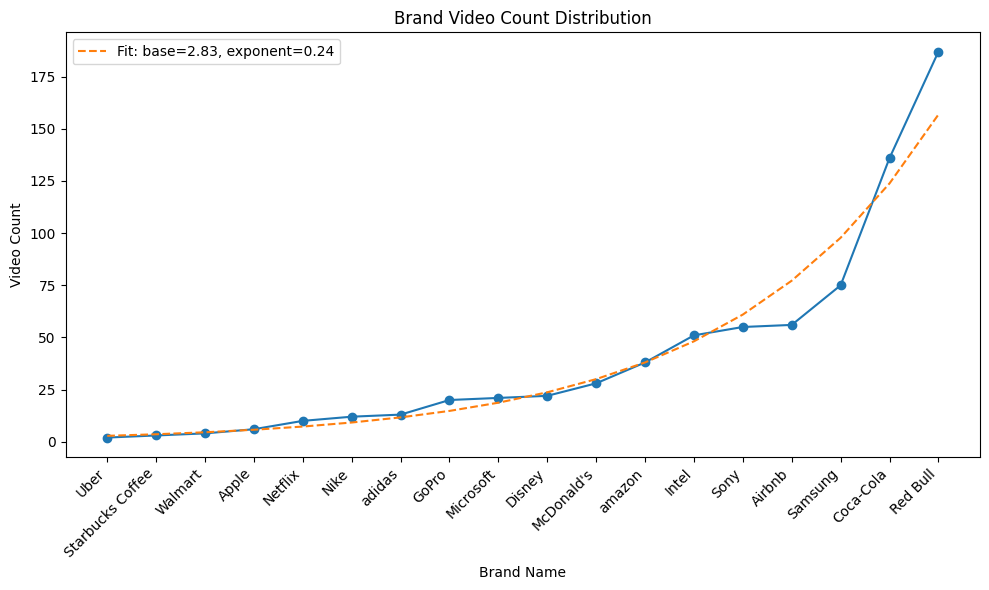

Base: 2.8266460254657817, Exponent: 0.23624489477661753


In [36]:
import numpy as np
import matplotlib.pyplot as plt

filtered_video_records_df = filtered_video_records_df.assign(
    views_per_sub=lambda x: np.where(x['subscriber_count'] > 0, 
                                   x['view_count']/x['subscriber_count'], 
                                   np.nan),
    like_per_view=lambda x: np.where(x['view_count'] > 0, 
                                   x['like_count']/x['view_count'], 
                                   np.nan),
    dislike_per_view=lambda x: np.where(x['view_count'] > 0, 
                                      x['dislike_count']/x['view_count'], 
                                      np.nan),
    comment_per_view=lambda x: np.where(x['view_count'] > 0, 
                                      x['comment_count']/x['view_count'], 
                                      np.nan)
)

# Calculate channel statistics
channel_stats = (
    filtered_video_records_df.groupby('channel_name')
    .agg(
        video_count=('video_id', 'count'),
        avg_views_per_sub=('views_per_sub', 'mean'),
        avg_like_per_view=('like_per_view', 'mean'),
        avg_dislike_per_view=('dislike_per_view', 'mean'),
        avg_comment_per_view=('comment_per_view', 'mean')
    )
    .reset_index()
    .sort_values('video_count', ascending=False)
)

# Sort by video_count ascending
channel_stats = channel_stats.sort_values('video_count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
channels = list(channel_stats['channel_name'])
counts = list(channel_stats['video_count'])

plt.plot(channels, counts, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Video Count')
plt.title('Brand Video Count Distribution')

# Log-transform to check exponential growth
log_counts = np.log(counts)
coefficients = np.polyfit(range(len(log_counts)), log_counts, 1)
fitted_exponent = coefficients[0]
fitted_base = np.exp(coefficients[1])

# Plot exponential fitting
fitted_counts = fitted_base * np.exp(fitted_exponent * np.arange(len(counts)))
plt.plot(channels, fitted_counts, '--', label=f'Fit: base={fitted_base:.2f}, exponent={fitted_exponent:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Output base and exponent
print(f"Base: {fitted_base}, Exponent: {fitted_exponent}")


In [37]:
# Visualization with multiple metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
top_channels = channel_stats.head(15)

# Create position indexes for grouped bars
indexes = range(len(top_channels))
bar_width = 0.2

metrics = ['avg_views_per_follower', 'avg_like_per_view', 
           'avg_dislike_per_view', 'avg_comment_per_view']
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.barh([x + i*bar_width for x in indexes], 
             top_channels[metric], 
             height=bar_width, 
             color=color, 
             label=metric.replace('_', ' ').title())

plt.yticks([x + bar_width*1.5 for x in indexes], top_channels['channel_name'])
plt.xlabel('Metric Values')
plt.title('Brand Performance Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

KeyError: 'avg_views_per_follower'

<Figure size 1400x800 with 0 Axes>

/home/mhammed/anaconda3/envs/conda_vid_eval/lib/python3.11/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/mhammed/anaconda3/envs/conda_vid_eval/lib/python3.11/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


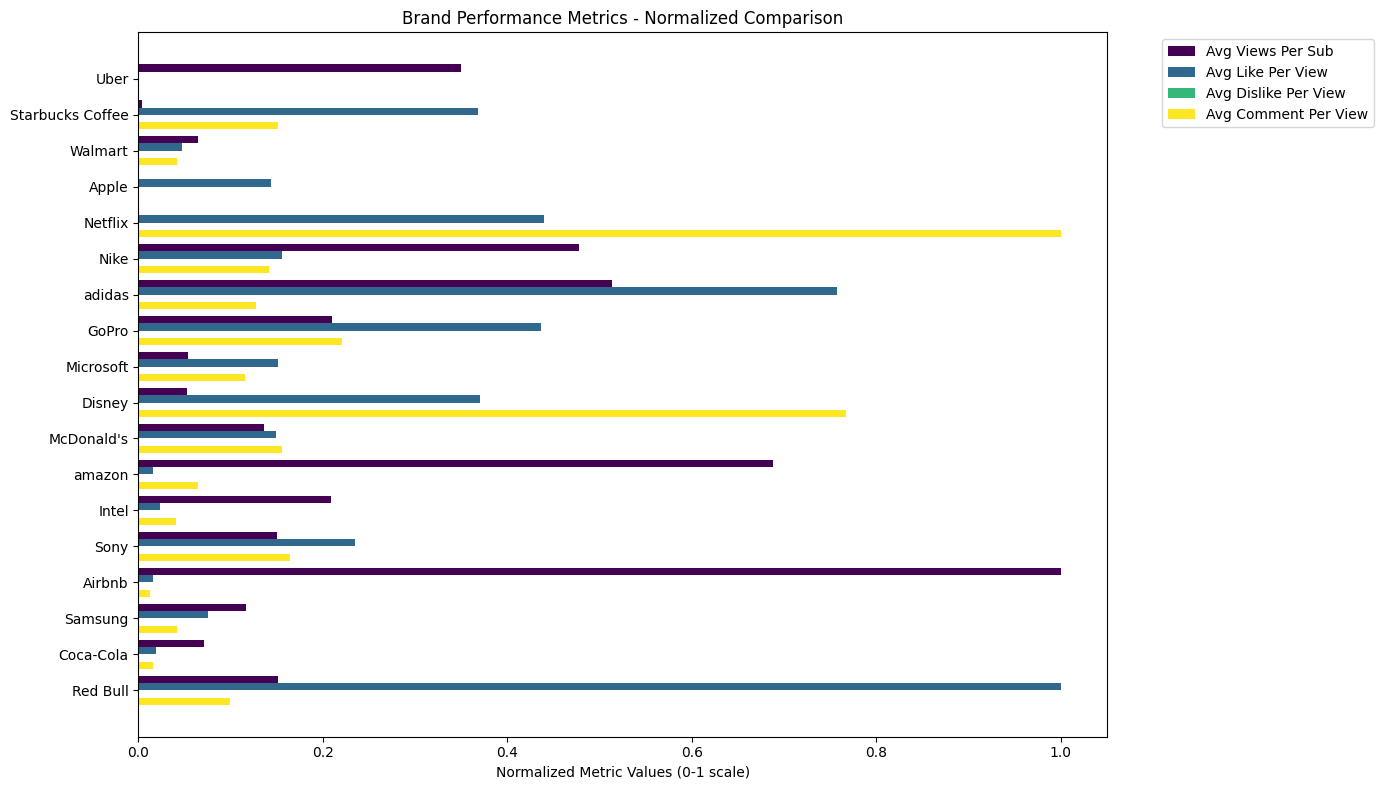

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of metrics to normalize
metrics_to_normalize = [
    'avg_views_per_follower',
    'avg_like_per_view', 
    'avg_dislike_per_view',
    'avg_comment_per_view'
]

# Initialize scaler and perform normalization
scaler = MinMaxScaler()
channel_stats[[f"{col}_normalized" for col in metrics_to_normalize]] = scaler.fit_transform(
    channel_stats[metrics_to_normalize]
)

# Update visualization with normalized values
plt.figure(figsize=(14, 8))

indexes = range(len(channel_stats))
bar_width = 0.2

# Use normalized metrics
normalized_metrics = [f"{col}_normalized" for col in metrics_to_normalize]
colors = plt.cm.viridis(np.linspace(0, 1, len(normalized_metrics)))

for i, (metric, color) in enumerate(zip(normalized_metrics, colors)):
    plt.barh([x + i*bar_width for x in indexes], 
             channel_stats[metric], 
             height=bar_width, 
             color=color, 
             label=metric.replace('_normalized', '').replace('_', ' ').title())

plt.yticks([x + bar_width*1.5 for x in indexes], channel_stats['channel_name'])
plt.xlabel('Normalized Metric Values (0-1 scale)')
plt.title('Brand Performance Metrics - Normalized Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
filtered_video_records_df.to_csv('final_filtered_youtube_videos_data.csv', index=False)